In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
#reading the csv file
data=pd.read_csv("air_quality_pm2.5.csv")

In [3]:
data.drop("Unnamed: 0",axis=1,inplace=True)
data.head()

,year,pollution
0,2008-01,14.7
1,2008-02,28.8
2,2008-03,12.3
3,2008-04,20.5
4,2008-05,27.5


In [4]:
data["year"] = pd.to_datetime(data["year"])

In [5]:
data.set_index('year',inplace=True)

In [6]:
data.head()

,pollution
year,
2008-01-01,14.7
2008-02-01,28.8
2008-03-01,12.3
2008-04-01,20.5
2008-05-01,27.5


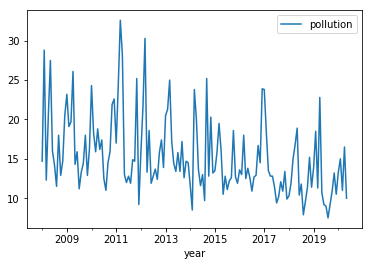

In [7]:
data.plot()

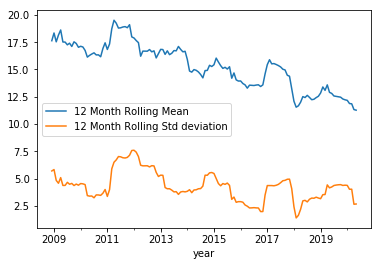

In [9]:
#visualising pollution levels
ts = data['pollution']
ts.rolling(12).mean().plot(label='12 Month Rolling Mean')
ts.rolling(12).std().plot(label='12 Month Rolling Std deviation')
plt.legend(loc="best")

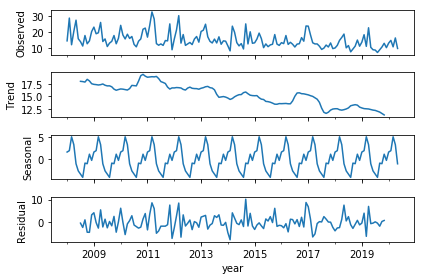

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data['pollution'])  
fig = decomposition.plot() 

In [11]:
from statsmodels.tsa.stattools import adfuller

In [12]:
#Creating function for later use
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")


In [13]:
#Check if the time series is Stationary or Not.
adf_check(data['pollution'])

Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.1478328188315243
p-value : 0.6956249294804893
#Lags Used : 11
Number of Observations Used : 137
weak evidence against null hypothesis, time series is non-stationary 


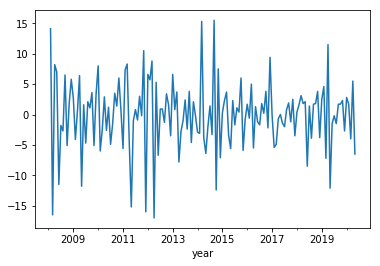

In [14]:
#make the time series stationary
from statsmodels.tsa.statespace.tools import diff
data['pollution First Difference']= diff(data['pollution'],k_diff=1)
data["pollution First Difference"].plot()

In [15]:
adf_check(data['pollution First Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -9.164236221731276
p-value : 2.485501783901825e-15
#Lags Used : 10
Number of Observations Used : 137
strong evidence against the null hypothesis, reject the null hypothesis. Data is stationary


In [16]:
data.head()

,pollution,pollution First Difference
year,,
2008-01-01,14.7,NaN
2008-02-01,28.8,14.1
2008-03-01,12.3,-16.5
2008-04-01,20.5,8.2
2008-05-01,27.5,7.0


In [17]:
data['Seasonal Difference'] = data['pollution'] - data['pollution'].shift(12)
data.head(20)

,pollution,pollution First Difference,Seasonal Difference
year,,,
2008-01-01,14.7,NaN,NaN
2008-02-01,28.8,14.1,NaN
2008-03-01,12.3,-16.5,NaN
2008-04-01,20.5,8.2,NaN
2008-05-01,27.5,7.0,NaN
2008-06-01,16.0,-11.5,NaN
2008-07-01,14.2,-1.8,NaN
2008-08-01,11.5,-2.7,NaN
2008-09-01,18.0,6.5,NaN


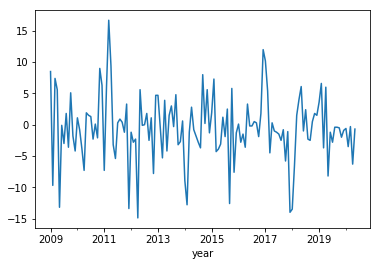

In [18]:
data['Seasonal Difference'].plot()

In [19]:
adf_check(data['Seasonal Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -6.3721495595849795
p-value : 2.330816070786676e-08
#Lags Used : 12
Number of Observations Used : 124
strong evidence against the null hypothesis, reject the null hypothesis. Data is stationary


In [20]:
data['Seasonal First Difference'] = data['pollution First Difference'] - data['pollution First Difference'].shift(12)
data.head(20)

,pollution,pollution First Difference,Seasonal Difference,Seasonal First Difference
year,,,,
2008-01-01,14.7,NaN,NaN,NaN
2008-02-01,28.8,14.1,NaN,NaN
2008-03-01,12.3,-16.5,NaN,NaN
2008-04-01,20.5,8.2,NaN,NaN
2008-05-01,27.5,7.0,NaN,NaN
2008-06-01,16.0,-11.5,NaN,NaN
2008-07-01,14.2,-1.8,NaN,NaN
2008-08-01,11.5,-2.7,NaN,NaN
2008-09-01,18.0,6.5,NaN,NaN


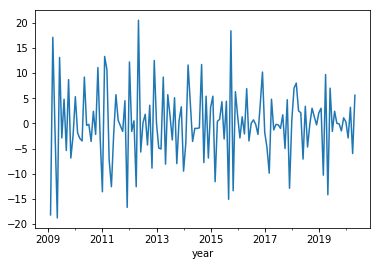

In [21]:
data['Seasonal First Difference'].plot()

In [22]:
adf_check(data['Seasonal First Difference'].dropna())


Augmented Dickey-Fuller Test:
ADF Test Statistic : -4.928242657557876
p-value : 3.0718544230738715e-05
#Lags Used : 13
Number of Observations Used : 122
strong evidence against the null hypothesis, reject the null hypothesis. Data is stationary


In [23]:
from pmdarima import auto_arima

In [24]:
stepwise_fit = auto_arima(data['pollution'], start_p=0, start_q=0,
                          max_d = 2,max_p=4, max_q=4, m=12,start_P=0,start_Q=0,
                          max_P=4, D=2, max_Q=4,max_D=3,
                          seasonal=True,
                          d=1, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True) 

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 2, 0, 12); AIC=968.017, BIC=973.658, Fit time=0.739 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 2, 0, 12); AIC=887.747, BIC=899.028, Fit time=0.541 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 2, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 2, 0, 12); AIC=938.663, BIC=947.124, Fit time=0.144 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 2, 0, 12); AIC=860.812, BIC=874.913, Fit time=1.515 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 2, 1, 12); AIC=840.284, BIC=857.206, Fit time=1.893 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(3, 2, 2, 12); AIC=841.818, BIC=864.380, Fit time=6.171 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(2, 2, 1, 12); AIC=872.356, BIC=886.458, Fit time=1.493 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(2, 2, 1, 12); AIC=829.174, BIC=848.916, Fit time=2.945 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(2, 2, 1, 12);

In [25]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  149
Model:             SARIMAX(3, 1, 1)x(1, 2, 1, 12)   Log Likelihood                -394.146
Date:                            Wed, 26 Aug 2020   AIC                            804.291
Time:                                    14:51:45   BIC                            826.854
Sample:                                         0   HQIC                           813.457
                                            - 149                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0025      0.015      0.160      0.873      -0.028       0.033
ar.L1         -0.0178      0.106     -0.168      0.866      -0.225       0.190
ar.L2         -0.0060      0.107     -0.056      0.955      -0.215       0.203
ar.L3         -0.0114      0.124     -0.092      0.926      -0.254       0.231
ma.L1         -0.9996      9.441     -0.106      0.916     -19.504      17.504
ar.S.L12      -0.4167      0.095     -4.376      0.000      -0.603      -0.230
ma.S.L12      -0.9996     76.731     -0.013      0.990    -151.389     149.389
sigma2        23.0956   1824.138      0.013      0.990   -3552.150    3598.341
===================================================================================
Ljung-Box (Q):                       38.26   Jarque-Bera (JB):                 0.12
Prob(Q):                              0.55   Prob(JB):                         0.94
Heteroskedasticity (H):               0.54   Skew:                             0.03
Prob(H) (two-sided):                  0.05   Kurtosis:                         3.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
model = sm.tsa.statespace.SARIMAX(data['pollution'],order=(3,1,1), seasonal_order=(1,2,1,12))
results = model.fit()

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [27]:
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                          pollution   No. Observations:                  149
Model:             SARIMAX(3, 1, 1)x(1, 2, 1, 12)   Log Likelihood                -394.192
Date:                            Wed, 26 Aug 2020   AIC                            802.384
Time:                                    14:52:35   BIC                            822.126
Sample:                                01-01-2008   HQIC                           810.404
                                     - 05-01-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0172      0.100     -0.173      0.863      -0.213       0.178
ar.L2         -0.0041      0.106   

In [28]:
prediction= results.predict(start = 0, end= 203)  
prediction.to_csv("pm2.5_predicted_pollution.csv")

In [30]:
predict=pd.read_csv("pm2.5_predicted_pollution.csv")
predict.head()

,2008-01-01,0.0
0,2008-02-01,14.699601
1,2008-03-01,28.799434
2,2008-04-01,12.300676
3,2008-05-01,20.499648
4,2008-06-01,27.499739


In [31]:
predict.columns=["year","pollution"]
predict.head()

,year,pollution
0,2008-02-01,14.699601
1,2008-03-01,28.799434
2,2008-04-01,12.300676
3,2008-05-01,20.499648
4,2008-06-01,27.499739


In [32]:
predict["year"]=pd.to_datetime(predict["year"])
predict.set_index("year",inplace=True)

In [33]:
predict.head()

,pollution
year,
2008-02-01,14.699601
2008-03-01,28.799434
2008-04-01,12.300676
2008-05-01,20.499648
2008-06-01,27.499739


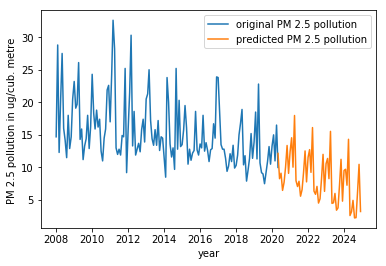

In [38]:
plt.plot(data["pollution"],label="original PM 2.5 pollution")
plt.plot(predict.iloc[147:204],label="predicted PM 2.5 pollution")
plt.legend(loc="best")
plt.xlabel("year")
plt.ylabel("PM 2.5 pollution in ug/cub. metre ")
plt.show()